In [14]:
%matplotlib inline

import datacube
from datacube.helpers import write_geotiff
import numpy as np
import xarray as xr
import sys

sys.path.append("../../Scripts")
import dea_datahandling
from dea_plotting import display_map
from dea_plotting import rgb

from odc.ui import with_ui_cbk

In [15]:
dc = datacube.Datacube(app="04_Loading_data")

In [16]:
# dc.list_measurements()

In [17]:
# Note the optional inclusion of the measurements list
ds_rgb = dc.load(product="ls8_nbart_geomedian_annual",
                 measurements=["red", "green", "blue"],
                 x=(149.499, 150.499),
                 y=(-34.999, -35.999),
                 time=("2018-01-01", "2018-12-31"))

print(ds_rgb)

<xarray.Dataset>
Dimensions:  (time: 1, x: 4213, y: 4910)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * y        (y) float64 -3.931e+06 -3.931e+06 ... -4.054e+06 -4.054e+06
  * x        (x) float64 1.573e+06 1.573e+06 1.573e+06 ... 1.678e+06 1.678e+06
Data variables:
    red      (time, y, x) int16 573 837 703 679 588 519 ... 97 100 109 93 97 96
    green    (time, y, x) int16 467 632 563 548 523 467 ... 171 182 166 166 167
    blue     (time, y, x) int16 350 435 401 380 341 326 ... 317 328 312 308 314
Attributes:
    crs:      EPSG:3577


In [18]:
dc = datacube.Datacube(app="05_Plotting")

In [20]:
lat_range = (-34.999, -35.999)
lon_range = (149.499, 150.499)
time_range = ("2018", "2018")

In [21]:
display_map(x=lon_range, y=lat_range)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [22]:
first_timestep = ds_rgb.sel(time='2018')

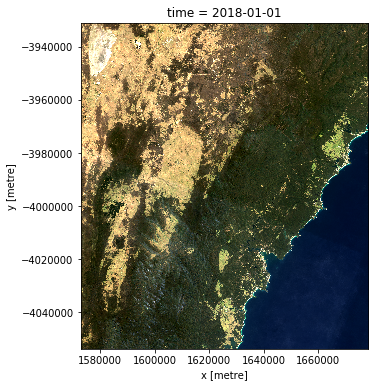

In [23]:
# View a red, green, blue (true colour) image of the first timestep
rgb(ds_rgb, bands=["red", "green", "blue"], index=0)

In [24]:
rgb_tiff = ds_rgb.isel(time=0)

write_geotiff('landsat-rgb.tif', rgb_tiff)